# Descriptive statistics

*Last updated: 2023-10-02*

- Set of M elements (numbers between 0 and 99)
    - Randomly generated
- Evaluate the distribution of generated values
- Comparison with the documentation of the function that generates the random ones
- Calculate various descriptive statistics quantities

The module for generating pseudo-random values from the Python library uses the Mersenne Twister method, developed in 1997 by Matsumoto&Nishimura. The most commonly used version of the algorithm is based on the Mersenne prime number $\displaystyle 2^{19937}-1$. A Mersenne prime number is one less than a power of two, $M_n = 2^n − 1$ for some integer $n$.

Article: M. Matsumoto and T. Nishimura, “Mersenne Twister: A 623-dimensionally equidistributed uniform pseudorandom number generator”, ACM Transactions on Modeling and Computer Simulation Vol. 8, No. 1, January pp.3–30 1998.

The purpose of the seed is to allow the user to "lock" the pseudo-random number generator, to allow replicable analysis.

random() generates a random float uniformly in the semi-open interval $0.0 \le x < 1.0$.

In [265]:
import numpy as np
import math as mt
from collections import Counter
import statistics as st
import scipy.stats as ss
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

In [138]:
rd.seed(1)
rd.random()

0.13436424411240122

Linear distribution:

In [139]:
m = 1000
sample = [int(rd.random()*100) for _ in range(m)]
sample[:10]

[84, 76, 25, 49, 44, 65, 78, 9, 2, 83]

Non-linear distribution:

In [288]:
x = np.linspace (0, 99, 99).astype(int)
sample = ss.gamma.pdf(x, a=2, scale=15)
sample = y / max(y) * 99
sample = y.astype(int)
print(x)
print(sample)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 99]
[ 0 16 31 44 55 64 72 79 84 88 92 95 96 98 98 99 98 98 97 95 94 92 90 88
 86 84 81 79 76 74 72 69 67 64 62 60 57 55 53 51 49 46 44 43 41 39 37 35
 34 32 31 29 28 27 25 24 23 22 21 20 19 18 17 16 15 14 14 13 12 11 11 10
 10  9  9  8  8  7  7  7  6  6  5  5  5  5  4  4  4  4  3  3  3  3  3  2
  2  2  2]


## Mean

In [291]:
mean = sum(sample) / len(sample)
mean

39.484848484848484

### Checking

In [292]:
st.mean(sample)

39

## Median

To find the median, we need to:

1. Sort the sample
2. Locate the value in the middle of the sorted sample

And then

- If the sample has an odd number of observations, then
    - The middle value is the median
- Else
    - Calculate the mean of the two middle values

Example:

- [3, 5, 1, 4, 2], sort: [1, 2, 3, 4, 5], median: 3

- [1, 2, 3, 4, 5, 6], median: (3 + 4) / 2 = 3.5

### Sample median

In [293]:
sor = sorted(sample)

    "//" = integer division
    "%" = remainder

In [294]:
mid = len(sor) // 2
mid

49

In [295]:
odd = len(sor) % 2
odd

1

In [296]:
if odd :
    medi = sor[mid]
else :
    medi = sum(sor[mid-1:mid+1])/2

medi

29

### Checking

In [297]:
st.median(sample)

29

## Mode

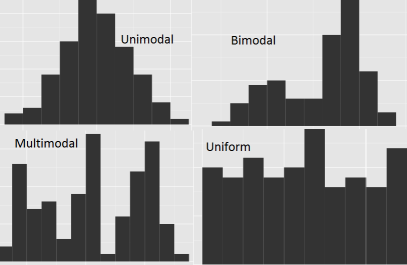

- The most frequent observation
- Given the list of data [1, 1, 2, 4, 4] its mode is not unique. A dataset, in such a case, is said to be bimodal, while a set with more than two modes may be described as multimodal. 

"Counter" counts the number of objects

In [298]:
c = Counter(sample)

most_common() returns a list of top 'n' elements from most common to least common

In [299]:
c.most_common(3)

[(3, 5), (98, 4), (5, 4)]

In [300]:
n = c.most_common()[0][1]

#### Sample mode

In [301]:
mde = [k for (k, v) in c.items() if v == n]
mde

[3]

#### Checking

In [302]:
st.multimode(sample)

[3]

st.mode(): If there is more than one such value, the first is returned:

In [303]:
st.mode(sample)

3

ss.mode(): If there is more than one such value, the smaller is returned:

In [304]:
ss.mode(sample)

ModeResult(mode=3, count=5)

## Variance

Measure of how far the values in a data set are from the mean or mean value.

$\sigma^2 = \frac{1}{n}{\sum_{i=0}^{n-1}{(x_i - \mu)^2}}$

$\mu$ = mean

### Sample variance

In [309]:
u = sum(sample) / len(sample)
a = [(i-u)**2 for i in sample]
s = sum(a) / len(a)
f"{s:.4f}"

'1119.1993'

### Checking

In [310]:
f'{st.pvariance(sample):.4f}'

'1119.0000'

## Standard Deviation

Measures the amount of variation or dispersion of a set of numeric values.

The standard deviation is a useful measurement because it has the same unit of measurement as the data itself.

$\sigma = \sqrt{\sigma^2}$

In [340]:
sigma = mt.sqrt(s)
sigma

33.45443566077723

### Checking

In [341]:
st.pstdev(sample.astype(float))

33.454435660777236

## Comparison

In [343]:
md(f'''
| Type | Description | Result |
| --- | --- | --- |
| Mean | Sum of values divided by number of values | {mean:.4f} |
| Median | Middle value separating the greater and lesser halves | {medi:.4f} |
| Mode | The most frequent observation | {mde} |
| Variance | How far the values are from the mean | {s:.0f} |
| SDeviation | Amount of variation or dispersion | {sigma:.4f} |
''')


| Type | Description | Result |
| --- | --- | --- |
| Mean | Sum of values divided by number of values | 39.4848 |
| Median | Middle value separating the greater and lesser halves | 29.0000 |
| Mode | The most frequent observation | [3] |
| Variance | How far the values are from the mean | 1119 |
| SDeviation | Amount of variation or dispersion | 33.4544 |


### Distribution plot

Geometric visualization of the mode, median and mean of an arbitrary density function

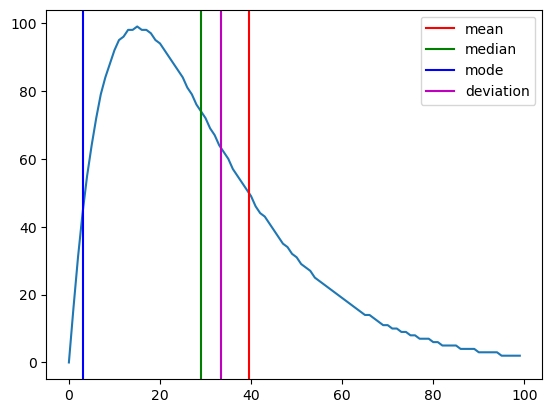

In [338]:
plt.plot(x, y)
plt.axvline(mean, c='r', label='mean')
plt.axvline(medi, c='g', label='median')
plt.axvline(mde, c='b', label='mode')
plt.axvline(sigma, c='m', label='deviation')
plt.legend(loc='best')
plt.show()

### Some properties

- Except for extremely small samples, the mode is insensitive to "outliers".
    - The median is also very robust in the presence of outliers.
    - The mean is rather sensitive.
- In continuous unimodal distributions the median often lies between the mean and the mode.
- For unimodal distributions
    - The mode is within √3 standard deviations of the mean
    - The root mean square deviation about the mode is between the standard deviation and twice the standard deviation

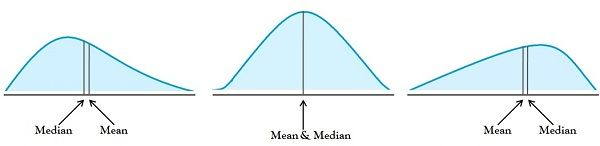

positively skewed, normal distribuition, negatiely skewed

| Comparison | Mean | Median |
| --- | --- | --- |
| Definition | Average value of a data set | Central numeric value of data set |
| Values | Takes ino account every value in the data set | Does not take every value into account |
| What is | It is an arithmetic average | It is a positional average |
| Represents | Center of gravity of data set | Center of gravity, and mid-point of data set |
| Applicability | Normal distribution | Skewed distribution |
| Outliers | Is sensitive | Not sensitive |

When to use:

| Where | Mean | Median | Mode |
| --- | --- | --- | --- |
| Categorical data | | | x |
| Has outliers | | x | x |
| Symmetrical | x | x | x |
| Skewed | | x | |

## References

- <https://en.wikipedia.org/wiki/Mode_(statistics)>
- <https://keydifferences.com/difference-between-mean-and-median.html>
- <https://www.differencebetween.com/difference-between-mean-and-median/>
- <https://www.onlinemathlearning.com/central-tendency-variance-6sp3.html>